<a href="https://colab.research.google.com/github/moaaz12-web/OpenCV-functions-and-YOLO-notebooks/blob/main/Image_processing_techniques_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Related video for thresholding: https://youtu.be/l1dhyw-EjSw?si=I-BXQ_n-USpe0JLf

# 1. IMAGE THRESHOLDING

Simplest form of image segmentation based on intensity value of pixels

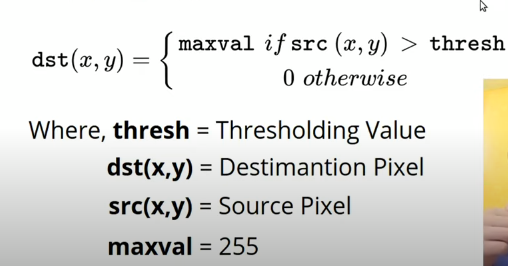

For every pixel, do:

1. If the pixel is greater than the threshold value, then make it equal to maxval.

2. If the pixcel intensity is less than the threshold value, then make it equal to 0.

## 1.1. TYPES OF THRESHOLDING

1. Global thresholding -- in which a particular threshold value is used against every pixel in the image. Examples include "manual (in which we specify the global threshold value ourselves), "otsu" and "traingle" (in which algorithm selects the global threshold value).

2. Adaptive thresholding -- in which we break the image into smaller tiles and then we find the thresholding parameters for each of those smaller tiles

## 1.2. GLOBAL MANUAL THRESHOLDING IMPLEMENTATION IN OPENV

`ret, thresh = cv2.threshold(gray_img, thresh, max_val, type`

where
1. gray_img is the grayscale image
2. thresh is the threshold value we specify ourselves
3. max_val is the maximum intensity value that will replace the original src 4.pixels
4. type is the variant of global manual thresholding used, which are explained below

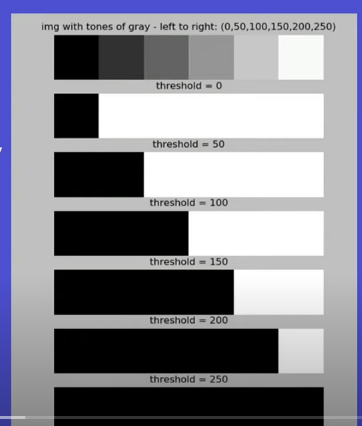

**EXPLANATION**
1. The first bar in above image is the original image pixels.

2. The second bar in above image shows that if we keep threshold equal to 0, then for all pixels in original image, if they are greater than 0, it will make it equal to maxval (255). If they are less than 0, make them black (0).

3. Similarly, the 2nd ast bar shows that if we keep threshold = 200, then if any pixel  is greater than 200, then it will make them white (255). And if any pixel is less than 200, it'll make them black.



## 1.3.  VARIANTS OF GLOBAL MANUAL THRESHOLDING

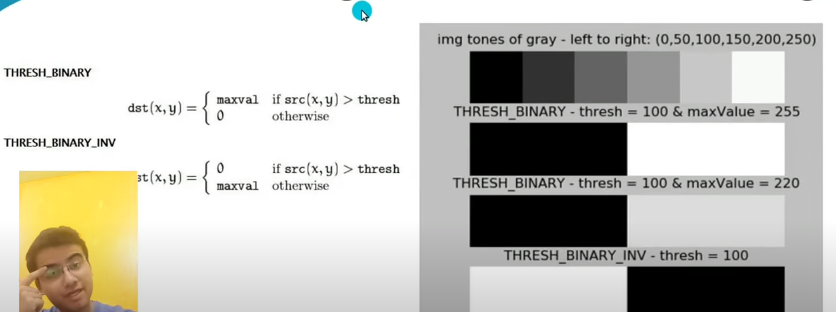

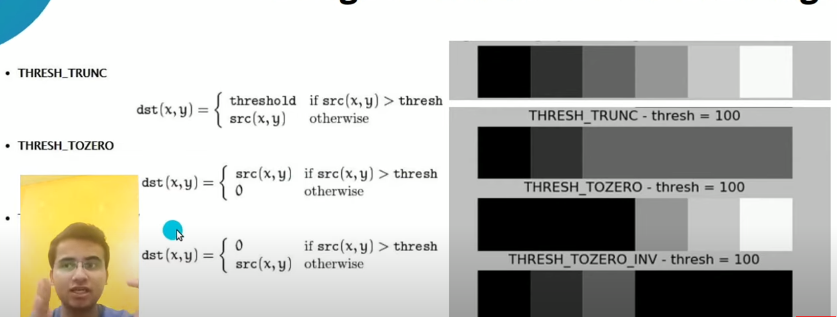

## 1.4. EXAMPLE OF GLOBAL MANUAL THRESHOLDING IN OPENCV ON EXAM PAPER USING `THRESH_BINARY` METHOD

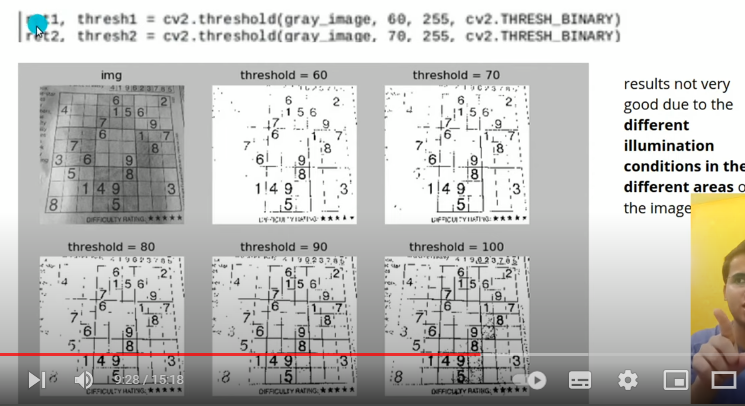

## 1.5. ADAPTIVE THRESHOLDING

This type computes thresholds for small parts of image

`cv2.adaptiveThreshold(gray_image, maxValue, adaptiveMethod, thresholdType, blockSize, c)`

where

1. gray_image is the grayscale image
2. maxValue is the value to replace pixel values greater than threshold value.
3. adaptiveMethod is the type of method (mean or gaussian) to use for calculaing the threshold value.
4. thresholdType is the type of thresholding variants we discussed above like binary, binary inverse etc.
5. blocksize is the subset size of the image we will use
6. c is the parameter we will subtract the result of the adaptiveMethod from (optional).



## 1.6. ADAPTIVE THRESHOLDING METHODS (MEAN AND GAUSSIAN)
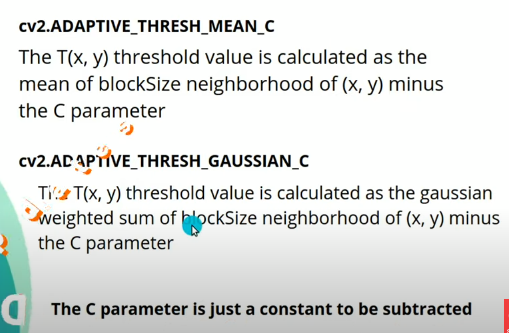

**EXAMPLE OF ADAPTIVE THRESHOLDING WITH BINARY THRESHOLDING TYPE AND MEAN ADAPTIVE THRESHOLDING METHOD**

1. Assume we have a 500x500 original image.
2. For every pixel in image, do:

    2.1. Choose a block size, for example, 11x11.
    
    2.2. For each pixel in the image, consider the corresponding 11x11 block.
    
    2.3. Calculate the mean value of the pixels in this block.
    
    2.4. Subtract a constant c from the calculated mean to get the threshold value for the block.
    
    2.5. For the same block, if a pixel value is greater than the calculated threshold, replace it with the threshold value.
    
    2.6. If the pixel value is less than or equal to the threshold, replace it with 0.


The result is a binary image where each pixel is determined by whether it is greater than the local mean threshold or not.


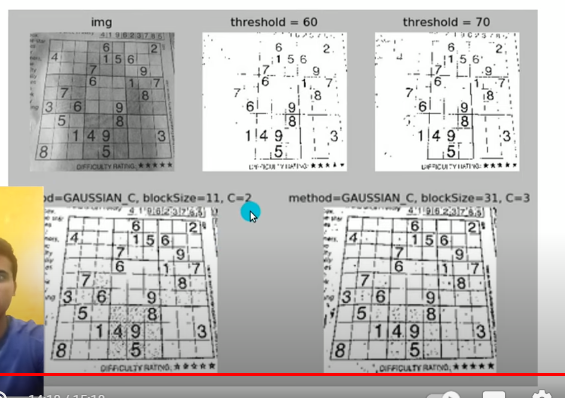

# CVF ASSIGNMENT START

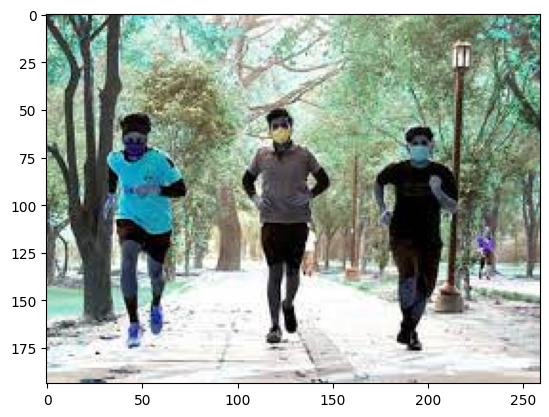

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an image
image = cv2.imread('/content/download (2).jpg')
plt.imshow(image);

In [ ]:
# Grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray');

# 2. IMAGE SEGMENTATION

### 2.1. USING ADAPTIVE THRESHOLDING

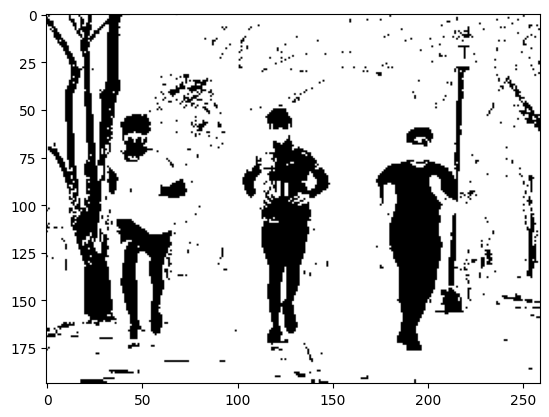

In [ ]:
thresh_adap = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 81, 55)
plt.imshow(thresh_adap, cmap='gray');

### 2.2. USING GLOBAL THRESHOLDING

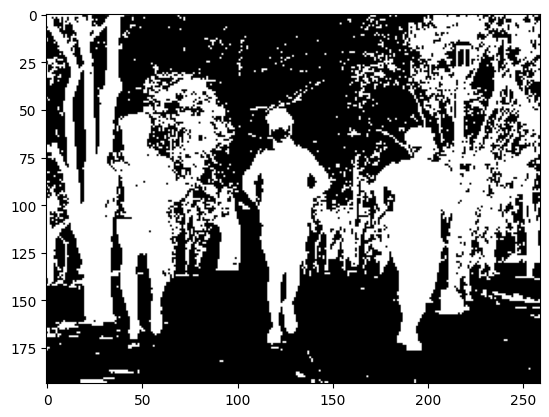

In [ ]:
ret, thresh_global = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh_global, cmap='gray');

# 3. CONTOUR DETECTION

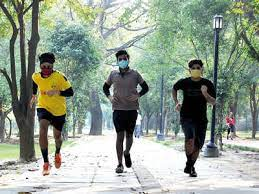

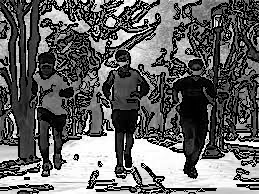

In [ ]:
from google.colab.patches import cv2_imshow

# Apply GaussianBlur to reduce noise and improve contour detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edged image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image with a thinner line
contour_image = np.copy(gray)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 1)  # Decreased line thickness

# Display the results
cv2_imshow(image)
cv2_imshow(contour_image)

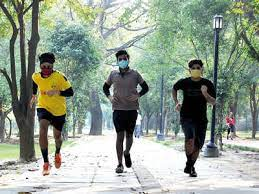

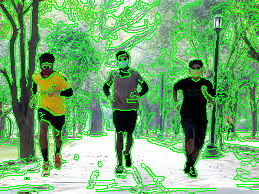

In [ ]:
contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 1)  # Decreased line thickness

# Display the results
cv2_imshow(image)
cv2_imshow(contour_image)

# 4. IMAGE REGISTRATION

In [ ]:
import cv2
import numpy as np

# Open the image files.
img1_color = cv2.imread("misaligned.jpg")  # Image to be aligned.
img2_color = cv2.imread("aligned.jpg")  # Reference image.

In [ ]:
# Convert to grayscale.
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
height, width = img2.shape

# Create ORB detector with 5000 features.
orb_detector = cv2.ORB_create(5000)

# Find keypoints and descriptors.
kp1, d1 = orb_detector.detectAndCompute(img1, None)
kp2, d2 = orb_detector.detectAndCompute(img2, None)

# Match features between the two images.
# We create a Brute Force matcher with
# Hamming distance as measurement mode.
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match the two sets of descriptors.
matches = matcher.match(d1, d2)

# Convert the list of DMatch objects to a numpy array.
matches = np.array(matches)

# Sort matches on the basis of their Hamming distance.
matches = sorted(matches, key=lambda x: x.distance)

# Take the top 90 % matches forward.
matches = matches[:int(len(matches) * 0.9)]
no_of_matches = len(matches)

# Define empty matrices of shape no_of_matches * 2.
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))

for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt

# Find the homography matrix.
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)

# Use this matrix to transform the
# colored image wrt the reference image.
transformed_img = cv2.warpPerspective(img1_color, homography, (width, height))

# Save the output.
cv2.imwrite('output.jpg', transformed_img)


In [ ]:
output_image = cv2.imread("output.jpg")
output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.imshow(output_image, cmap='gray');